<a href="https://colab.research.google.com/github/nikita-0209/stock_price_detection/blob/master/Stock_Prediction%3ANaive%20Forecast%2C%20Moving%20Averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
import keras

Using TensorFlow backend.


In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"12f9gd7u5hGDwWEZgOd-O9iMkM6lE9vF-"})   # replace the id with id of file you want to access
downloaded.GetContentFile('stock_prices_sample.csv')        # replace the file name with your file

In [0]:
df=pd.read_csv('stock_prices_sample.csv')

# Prepare Data

In [0]:
df

,TICKER,FIGI,DATE,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
0,GEF,BBG000BLFQH8,2013-01-04,EOD,daily,46.31,47.6198,46.23,47.37,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
1,GEF,BBG000BLFQH8,2013-01-03,EOD,daily,46.43,46.5200,46.14,46.48,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2,GEF,BBG000BLFQH8,2013-01-02,EOD,daily,45.38,46.5400,45.16,46.41,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
3,GF,BBG000C3C6S2,2018-06-05,Intraday,daily,18.86,18.9100,18.87,18.87,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
4,GF,BBG000C3C6S2,2018-06-04,EOD,daily,18.86,18.8900,18.79,18.81,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,GF,BBG000C3C6S2,2014-06-27,EOD,daily,18.63,18.6300,18.51,18.61,28400.0,11.717560,11.717560,11.642085,11.704981,28400.0,NaN,0.0,1.0
995,GF,BBG000C3C6S2,2014-06-26,EOD,daily,18.52,18.5901,18.42,18.53,60000.0,11.648374,11.692464,11.585478,11.654664,60000.0,NaN,0.0,1.0
996,GF,BBG000C3C6S2,2014-06-25,EOD,daily,18.66,18.7200,18.59,18.60,171700.0,11.736429,11.774167,11.692402,11.698691,171700.0,NaN,0.0,1.0
997,GF,BBG000C3C6S2,2014-06-24,EOD,daily,18.91,18.9500,18.83,18.83,35200.0,11.893669,11.918828,11.843352,11.843352,35200.0,NaN,0.0,1.0


In [0]:
def get_year(date):
  year=date.split('-')[0]
  return year

In [0]:
df['Year']=df['DATE'].apply(get_year)

In [0]:
df = df[df['Year'] != '2013']

In [0]:
df

,TICKER,FIGI,DATE,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO,Year
3,GF,BBG000C3C6S2,2018-06-05,Intraday,daily,18.86,18.9100,18.8700,18.87,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0,2018
4,GF,BBG000C3C6S2,2018-06-04,EOD,daily,18.86,18.8900,18.7900,18.81,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0,2018
5,GF,BBG000C3C6S2,2018-06-01,EOD,daily,18.58,18.7600,18.5800,18.74,17468.0,18.580000,18.760000,18.580000,18.740000,17468.0,NaN,0.0,1.0,2018
6,GF,BBG000C3C6S2,2018-05-31,EOD,daily,18.52,18.5200,18.3012,18.49,22384.0,18.520000,18.520000,18.301200,18.490000,22384.0,NaN,0.0,1.0,2018
7,GF,BBG000C3C6S2,2018-05-30,EOD,daily,18.47,18.6780,18.4700,18.65,22633.0,18.470000,18.678000,18.470000,18.650000,22633.0,NaN,0.0,1.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,GF,BBG000C3C6S2,2014-06-27,EOD,daily,18.63,18.6300,18.5100,18.61,28400.0,11.717560,11.717560,11.642085,11.704981,28400.0,NaN,0.0,1.0,2014
995,GF,BBG000C3C6S2,2014-06-26,EOD,daily,18.52,18.5901,18.4200,18.53,60000.0,11.648374,11.692464,11.585478,11.654664,60000.0,NaN,0.0,1.0,2014
996,GF,BBG000C3C6S2,2014-06-25,EOD,daily,18.66,18.7200,18.5900,18.60,171700.0,11.736429,11.774167,11.692402,11.698691,171700.0,NaN,0.0,1.0,2014
997,GF,BBG000C3C6S2,2014-06-24,EOD,daily,18.91,18.9500,18.8300,18.83,35200.0,11.893669,11.918828,11.843352,11.843352,35200.0,NaN,0.0,1.0,2014


In [0]:
data=df[ ['DATE', 'OPEN']]

In [0]:
#Reverse Order of Data
data=data.iloc[::-1]

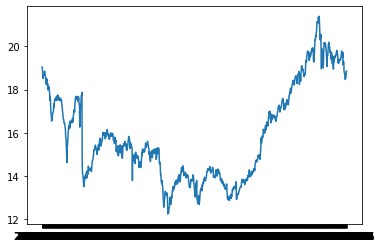

In [0]:
plt.plot(data['DATE'], data['OPEN'])

In [0]:
split_time=850

In [0]:
values=np.array(df['OPEN'])

In [0]:
train_df=data.iloc[:split_time]

In [0]:
train_values=train_df['OPEN']
train_values=np.array(train_values)

In [0]:
series= np.concatenate((train_values, valid_values), axis=0)

In [0]:
train_values.shape

(850,)

In [0]:
train_df.shape

(850, 2)

In [0]:
valid_df=data.iloc[split_time:]

In [0]:
valid_df.shape

(146, 2)

In [0]:
valid_values=valid_df['OPEN']
valid_values=np.array(valid_values)

#Naive Method

In [0]:
naive_forecast=series[split_time-1:-1]

In [0]:
naive_forecast.shape

(146,)

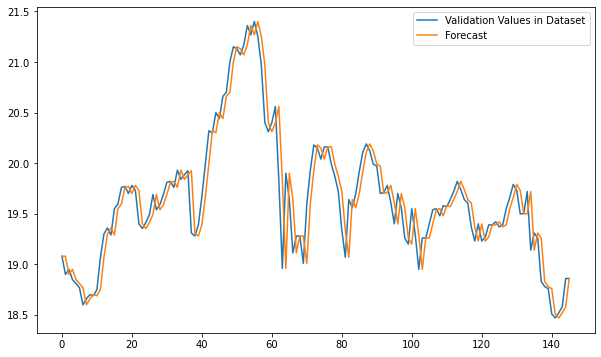

In [0]:
plt.figure(figsize=(10, 6))
plt.plot(valid_values, label='Validation Values in Dataset')
plt.plot(naive_forecast, label='Forecast')
leg=plt.legend()

In [0]:
print(keras.metrics.mean_absolute_percentage_error(valid_values, naive_forecast).numpy())

0.8252412


# Moving Average

Rolling cannot be applied to numpy arrays, so we have to write the code

In [0]:
window=10

In [0]:
def moving_average(values, window):
  N=values.shape[0]-window
  mov_avg=np.zeros(N)
  for i in range(N):
    mov_avg[i]=values[i:i+window].mean()
  return mov_avg


In [0]:
forecast=moving_average(series, window)[split_time-window:]

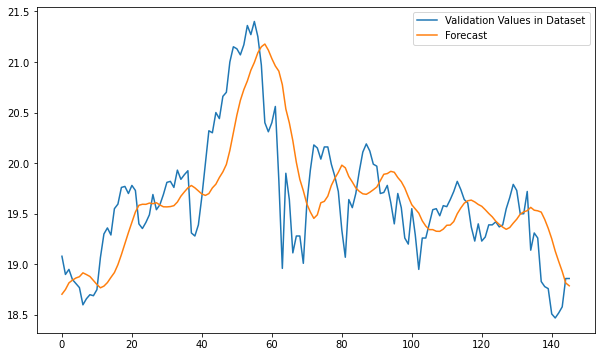

In [0]:
plt.figure(figsize=(10, 6))
plt.plot(valid_values, label='Validation Values in Dataset')
plt.plot(forecast, label='Forecast')
leg=plt.legend()

In [0]:
print(keras.metrics.mean_absolute_percentage_error(valid_values, forecast).numpy())

1.8047655


### Moving Average with Difference is applicable only if data has seasonality. Our data does not have seasonality, hence, there is no point of using this technique